In [0]:
# Run on TensorFlow 2.x
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
# Import relevant modules
import json, requests
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import PolynomialFeatures

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

print("Imported modules.")

Imported modules.


In [3]:
covid_data = json.loads(requests.get('https://www.dph.illinois.gov/sitefiles/COVIDHistoricalTestResults.json?nocache=1').text)
stateTestingResults = covid_data["state_testing_results"]["values"]

indices = np.arange(1, len(stateTestingResults))
changeInCasesByDay = []

for i in range(1, len(stateTestingResults)):
  changeInCases = stateTestingResults[i]["confirmed_cases"] - stateTestingResults[i-1]["confirmed_cases"]
  changeInCasesByDay.append(changeInCases)

train_df = pd.DataFrame({"Day": indices, "Change in Cases": changeInCasesByDay})

print("Imported data.")

Imported data.


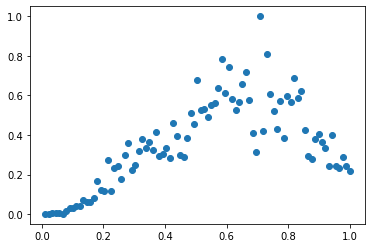

Created dataset.


In [4]:
# Creating dataset
x = list(train_df["Day"])
y = list(train_df["Change in Cases"])

# Converting to numpy arrays
x = np.array(x)
y = np.array(y)

# Scaling dataset
x = x/max(x)
y = y/max(y)

# Display dataset
plt.scatter(x,y)
plt.show()

print('Created dataset.')

In [5]:
def build_model(learning_rate):
  model = tf.keras.Sequential()
  model.add(keras.layers.Dense(units=1, input_shape=[5]))
  optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)
  model.compile(optimizer=optimizer, loss='mean_squared_error')
  return model

def train_model(model, feature, label, epochs, batch_size):
  history = model.fit(x=feature, y=label, batch_size=batch_size, epochs=epochs, verbose=True)
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]
  hist_loss = history.history['loss']
  return hist_loss, trained_weight, trained_bias

print('Created functions that build and train model.')

Created functions that build and train model.


In [6]:
def plot_model_loss(hist_loss):
  plt.plot(hist_loss)
  plt.xlabel('Epochs')
  plt.ylabel('MSE Loss')
  plt.title('MSE Loss vs Epochs Run')
  plt.show()

def plot_model(hist_loss, x_poly):
  mse = hist_loss[-1]
  y_hat = model.predict(x_poly)

  plt.figure(figsize=(12,7))
  plt.title('ML Curve Fit')
  plt.scatter(x, y, label='Actual Data')
  plt.plot(x, y_hat, color='red', label='Predicted Curve', linewidth=4.0)
  plt.xlabel('$Days$', fontsize=20)
  plt.ylabel('$Change in Cases$', fontsize=20)
  plt.text(0, 0.70, 'MSE = {:.3f}'.format(mse), fontsize=20)
  plt.grid(True)
  plt.legend(fontsize=20)
  plt.show()

print('Created functions that plots model and model loss.')

Created functions that plots model and model loss.


Epoch 1/750
9/9 [==============================] - 0s 1ms/step - loss: 0.8935
Epoch 2/750
9/9 [==============================] - 0s 1ms/step - loss: 0.6509
Epoch 3/750
9/9 [==============================] - 0s 1ms/step - loss: 0.4442
Epoch 4/750
9/9 [==============================] - 0s 1ms/step - loss: 0.3054
Epoch 5/750
9/9 [==============================] - 0s 1ms/step - loss: 0.2066
Epoch 6/750
9/9 [==============================] - 0s 1ms/step - loss: 0.1411
Epoch 7/750
9/9 [==============================] - 0s 1ms/step - loss: 0.1065
Epoch 8/750
9/9 [==============================] - 0s 1ms/step - loss: 0.0858
Epoch 9/750
9/9 [==============================] - 0s 1ms/step - loss: 0.0745
Epoch 10/750
9/9 [==============================] - 0s 1ms/step - loss: 0.0707
Epoch 11/750
9/9 [==============================] - 0s 1ms/step - loss: 0.0691
Epoch 12/750
9/9 [==============================] - 0s 1ms/step - loss: 0.0678
Epoch 13/750
9/9 [==============================] - 0s 1ms/st

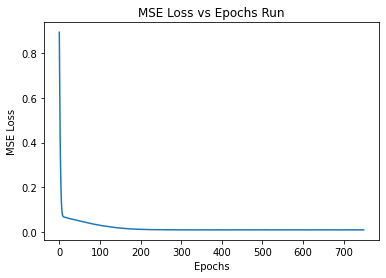

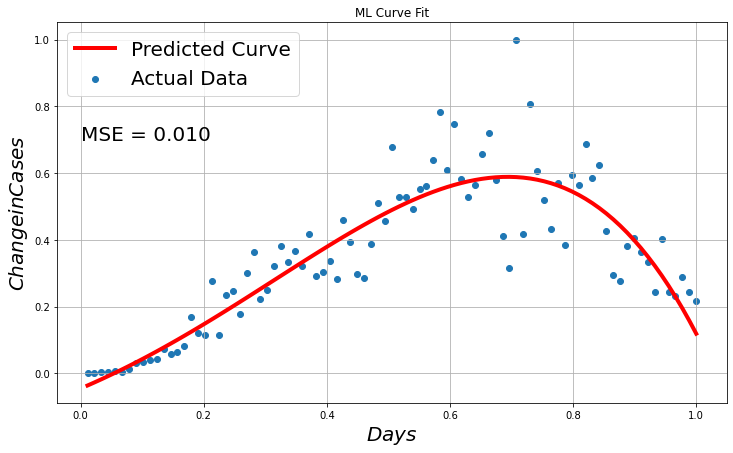

In [11]:
poly = PolynomialFeatures(degree=4)
x_poly = poly.fit_transform(x.reshape(-1,1))

learning_rate = 0.005
epochs = 750
batch_size = 10

model = build_model(learning_rate)

hist_loss, trained_weight, trained_bias = train_model(model, x_poly, y, epochs, batch_size)

plot_model_loss(hist_loss)
plot_model(hist_loss, x_poly)